In [2]:
# Lecture 3: Basic Monte Carlo

In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Example: Calculate the area of a circle.

Area= 12.5664 pi= 3.1416


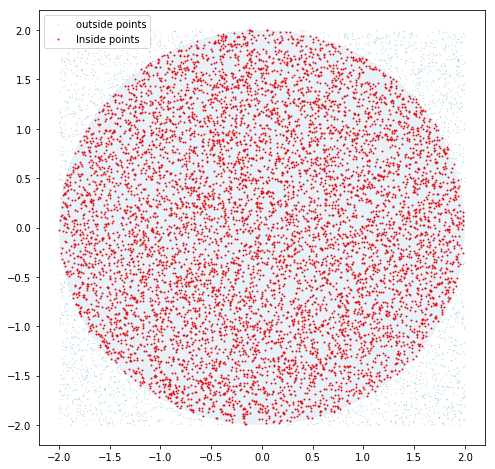

In [5]:
plt.figure(figsize=(8,8))  # set the figure size

# Calculate the radius of cirlce with radius 

radius = 2

N= 10000  #Use 10000 points 
X = np.random.uniform(low=-radius, high=radius, size=N)  # Random numbers from -1 to 1
Y = np.random.uniform(low=-radius, high=radius, size=N)   

plt.scatter(X,Y, s=.1, alpha=0.3, label=u'outside points')  

# drawing a circle 
crc=plt.Circle([0,0], radius = radius, alpha=0.1)
fig = plt.gcf()
fig.gca().add_artist(crc)

# calculate the distance from the center 
R = np.sqrt(X**2+Y**2);  
plt.scatter(X[R<radius],Y[R<radius], c='r', s=1, alpha=0.9, label=u'Inside points')

Abox =(2.0*radius)**2      # This is the big box 
Ninside= 0    
Noutside = 0

for i in np.arange(0,N):
    if R[i]<=1:
        Ninside =Ninside+1
    else:
        Noutside = Noutside+1
        
# Alternative and faster 
Ninside=np.sum(R<radius)
Area = Abox*Ninside/N
plt.legend()
#Area = Abox * Ninside/(Noutside+Ninside)
print ("Area=", Area, "pi=", Area/radius**2)

In [6]:
# 3. Monte Carlo inegration

In [7]:
def f(x):
    return x**2 + 4*x*np.sin(x) 

def intf(x): 
    return x**3/3.0+4.0*np.sin(x) - 4.0*x*np.cos(x) 

In [8]:
a = 2;    
b = 3; 

# use N draws 
N= 10000

X = np.random.uniform(low=a, high=b, size=N) # N values uniformly drawn from a to b 
Y =f(X)   # CALCULATE THE f(x) 

Imc= (b-a) * np.sum(Y)/ N;

exactval=intf(b)-intf(a)

print ("Monte Carlo estimation=",Imc, "Exact number=", intf(b)-intf(a))

Monte Carlo estimation= 11.809160551238326 Exact number= 11.811358925098283


In [9]:
# Mutlidimensional integral

In [10]:
fmd = lambda x,y: x*x + y*y

In [12]:
# use N draws 
N= 8000
X= np.random.uniform(low=-1, high=1, size=N) 
Y= np.random.uniform(low=-1, high=1, size=N) 
Z=fmd(X, Y)   # CALCULATE THE f(x) 

R = X**2 + Y**2

N = np.sum(R<1)
sumsamples = np.sum(Z[R<1])

print ("I=",np.pi*1.0*1.0*sumsamples/N, "actual", np.pi/2.0) #actual value (change to polar to calculate)

I= 1.5628457303456083 actual 1.5707963267948966


In [13]:
# Monte-Carlo as a function of number of samples

Text(0,0.5,'sqrt((Imc-ExactValue)$^2$)')

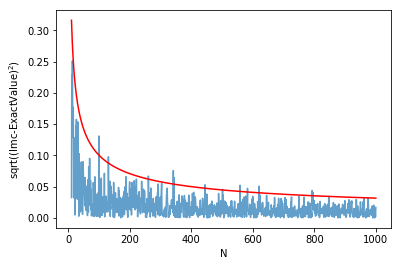

In [17]:
Imc=np.zeros(1000)
Na = np.linspace(0,1000,1000)

exactval= intf(b)-intf(a)

for N in np.arange(0,1000):
    X = np.random.uniform(low=a, high=b, size=N) # N values uniformly drawn from a to b 
    Y =f(X)   # CALCULATE THE f(x) 

    Imc[N]= (b-a) * np.sum(Y)/ N;
    
    
plt.plot(Na[10:],np.sqrt((Imc[10:]-exactval)**2), alpha=0.7)
plt.plot(Na[10:], 1/np.sqrt(Na[10:]), 'r')
plt.xlabel("N")
plt.ylabel("sqrt((Imc-ExactValue)$^2$)")

In [18]:
# http://iacs-courses.seas.harvard.edu/courses/am207/blog/lecture-3.html